In [1]:
def generate_array(start, end):
    array = [10 ** (i+start) for i in range(end-start)]
    return array

C:\Users\ukisy\AppData\Local\Temp\ipykernel_8956\1475589371.py:43: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results.pivot(index='param_epsilon', columns='param_C', values='mean_test_score')


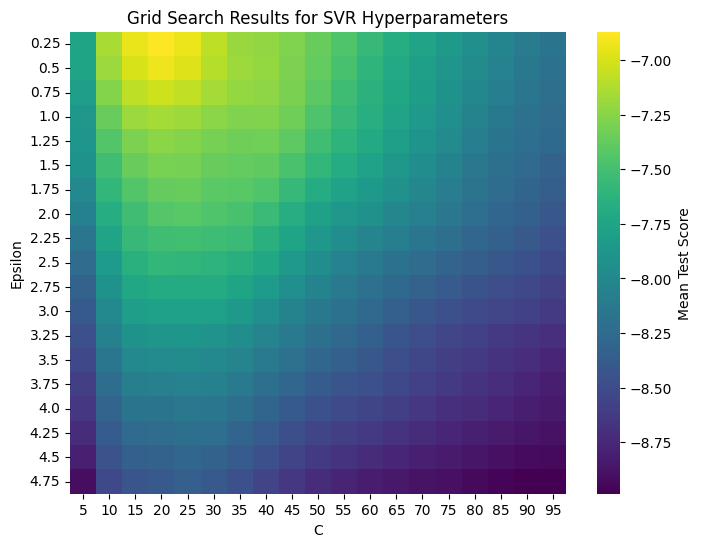

Best hyperparameters: {'C': 20, 'epsilon': 0.25}


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import joblib

# Generate synthetic data for demonstration
data = pd.read_csv('data-extraction-normalized.csv')

X_y = []

for i in data.columns:
  X_y.append(list(data[i]))
  
X = np.array(X_y[2:]).transpose()
y = np.array(X_y[1])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVR model
svr = SVR(kernel='rbf')

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': np.arange(5, 100, 5), 'epsilon': np.arange(0.25, 5, 0.25)}

# Create the GridSearchCV object
grid_search = GridSearchCV(svr, param_grid, cv=10, scoring='neg_mean_absolute_error')

# Fit the model with the training data
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
joblib.dump(best_model, 'diastole_model.pkl')

# Get the results as a Pandas DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Reshape the results for heatmap
heatmap_data = results.pivot(index='param_epsilon', columns='param_C', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='viridis', fmt=".4f", cbar_kws={'label': 'Mean Test Score'})
plt.title('Grid Search Results for SVR Hyperparameters')
plt.xlabel('C')
plt.ylabel('Epsilon')
plt.show()

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
